## Importing Libraries & Data

In [23]:
# import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# import data

df = pd.read_pickle("../data/usa_classified_tweets.pkl")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   150798 non-null  int64  
 1   text                 150798 non-null  object 
 2   location             150798 non-null  object 
 3   total_pop            150798 non-null  float64
 4   women                150798 non-null  float64
 5   hispanic             150798 non-null  float64
 6   white                150798 non-null  float64
 7   black                150798 non-null  float64
 8   native               150798 non-null  float64
 9   asian                150798 non-null  float64
 10  pacific              150798 non-null  float64
 11  income_per_cap       150798 non-null  float64
 12  poverty              150798 non-null  float64
 13  unemployment         150798 non-null  float64
 14  democrats            150798 non-null  float64
 15  republicans      

In [26]:
# drop unnecessary variables

df = df.drop(columns=['id', 'text', 'location', 'total_pop', 'republicans'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   women                150798 non-null  float64
 1   hispanic             150798 non-null  float64
 2   white                150798 non-null  float64
 3   black                150798 non-null  float64
 4   native               150798 non-null  float64
 5   asian                150798 non-null  float64
 6   pacific              150798 non-null  float64
 7   income_per_cap       150798 non-null  float64
 8   poverty              150798 non-null  float64
 9   unemployment         150798 non-null  float64
 10  democrats            150798 non-null  float64
 11  voting_age_citizens  150798 non-null  float64
 12  believer_denier      150798 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 15.0 MB


In [28]:
X = df.drop('believer_denier', axis=1)

y = df['believer_denier']

In [13]:
y.value_counts()

1    90224
0    60574
Name: believer_denier, dtype: int64

## Baseline Model (DummyClassifier)

In [29]:
from sklearn.dummy import DummyClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12146
           1       0.60      1.00      0.75     18014

    accuracy                           0.60     30160
   macro avg       0.30      0.50      0.37     30160
weighted avg       0.36      0.60      0.45     30160



/opt/anaconda3/envs/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Save this model

pickle.dump(dummy, open('baseline_task2.pkl','wb'))

## Random Forest Classifier (RFC)

In [32]:
# run model and generate classification report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43     12146
           1       0.65      0.84      0.73     18014

    accuracy                           0.64     30160
   macro avg       0.62      0.59      0.58     30160
weighted avg       0.63      0.64      0.61     30160



## RFC + Undersampling

In [33]:
# Random Undersampling

# define undersampling strategy
rus = RandomUnderSampler()

# fit and apply the transform
X_rus, y_rus = rus.fit_resample(X, y)

# summarize class distribution
print(Counter(y_rus))

Counter({0: 60574, 1: 60574})


In [35]:
# run model and generate classification report

X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     12243
           1       0.60      0.66      0.63     11987

    accuracy                           0.61     24230
   macro avg       0.61      0.61      0.61     24230
weighted avg       0.61      0.61      0.61     24230



## RFC + Oversampling

In [14]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

Counter({1: 90224, 0: 90224})


In [15]:
# run model and generate classification report

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     18099
           1       0.61      0.67      0.64     17991

    accuracy                           0.62     36090
   macro avg       0.62      0.62      0.62     36090
weighted avg       0.62      0.62      0.62     36090



In [16]:
# get ROC AUC scores

train_probs = model.predict_proba(X_train)[:,1] 
probs = model.predict_proba(X_test)[:, 1]
train_predictions = model.predict(X_train)

print(f'Train ROC AUC Score: {round(roc_auc_score(y_train, train_probs),2)}')
print(f'Test ROC AUC  Score: {round(roc_auc_score(y_test, probs),2)}')

Train ROC AUC Score: 0.68
Test ROC AUC  Score: 0.66


Baseline: {1.0} Test: {0.67} Train: {0.67}
Baseline: {0.5} Test: {0.61} Train: {0.61}
Baseline: {0.5} Test: {0.66} Train: {0.68}


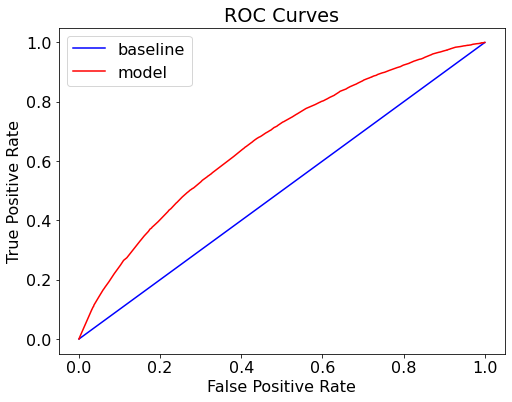

In [17]:
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
          print('Baseline:', {round(baseline[metric], 2)}, 
                 'Test:', {round(results[metric], 2)}, 
                 'Train:', {round(train_results[metric], 2)})
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();
evaluate_model(y_pred,probs,train_predictions,train_probs)

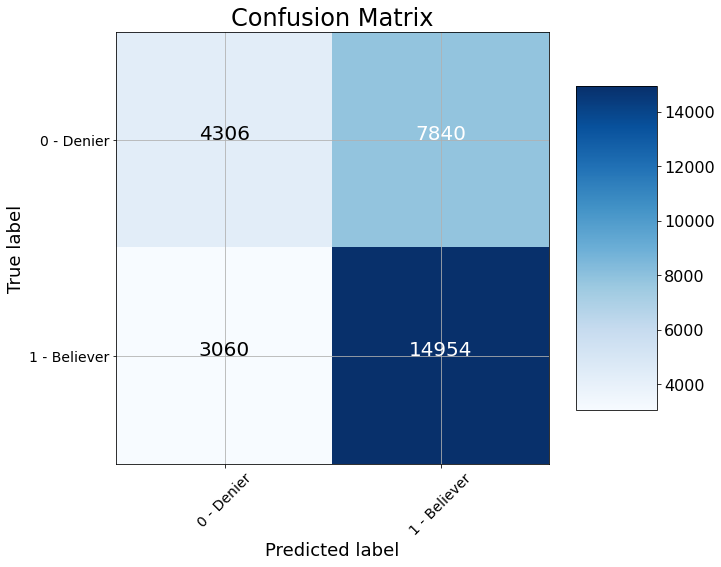

In [31]:
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Denier', '1 - Believer'],
                      title = 'Confusion Matrix')

## RFC Parameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# train-test split (using oversampled dataset)

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2, random_state = 42)

In [22]:
rf=RandomForestClassifier()

In [23]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [24]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

## RFC Prediction and Feature Importance

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [25]:
best_model = RandomForestClassifier(criterion='entropy',
                                    max_depth=8,
                                    max_features='sqrt',
                                    n_estimators= 200)

In [26]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     18099
           1       0.61      0.64      0.62     17991

    accuracy                           0.62     36090
   macro avg       0.62      0.62      0.62     36090
weighted avg       0.62      0.62      0.62     36090



Feature: 0, Score: 0.04753
Feature: 1, Score: 0.04769
Feature: 2, Score: 0.05369
Feature: 3, Score: 0.07923
Feature: 4, Score: 0.01787
Feature: 5, Score: 0.10343
Feature: 6, Score: 0.01781
Feature: 7, Score: 0.16387
Feature: 8, Score: 0.04108
Feature: 9, Score: 0.04177
Feature: 10, Score: 0.33239
Feature: 11, Score: 0.05363


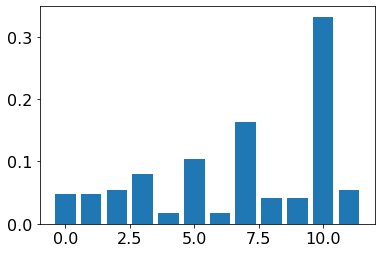

In [28]:
# Find scores that show how important each feature is

importance = best_model.feature_importances_

importances_dict = {}

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    importances_dict[i] = v

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
import pprint

importance_dic = {}

for feat, importance in zip(X.columns, best_model.feature_importances_):
    importance_dic[feat] = round(importance,3)
    
pprint.pprint(sorted(importance_dic.items(), key = lambda x: x[1], reverse = True))

[('democrats', 0.332),
 ('income_per_cap', 0.164),
 ('asian', 0.103),
 ('black', 0.079),
 ('white', 0.054),
 ('voting_age_citizens', 0.054),
 ('women', 0.048),
 ('hispanic', 0.048),
 ('unemployment', 0.042),
 ('poverty', 0.041),
 ('native', 0.018),
 ('pacific', 0.018)]


## Support Vector Classifier (SVC)

In [2]:
# import data again

df = pd.read_pickle("../data/usa_classified_tweets.pkl")

In [3]:
df = df.drop(columns=['id', 'text','location','total_pop', 'republicans',
                     'native','pacific'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   women                150798 non-null  float64
 1   hispanic             150798 non-null  float64
 2   white                150798 non-null  float64
 3   black                150798 non-null  float64
 4   asian                150798 non-null  float64
 5   income_per_cap       150798 non-null  float64
 6   poverty              150798 non-null  float64
 7   unemployment         150798 non-null  float64
 8   democrats            150798 non-null  float64
 9   voting_age_citizens  150798 non-null  float64
 10  believer_denier      150798 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 12.7 MB


In [5]:
# separate X and y

X = df.drop('believer_denier', axis=1)  
y = df['believer_denier']

In [6]:
# scale X

X = preprocessing.scale(X)

In [40]:
# SVC with no data manipulation (64% accuracy)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43     12146
           1       0.65      0.84      0.73     18014

    accuracy                           0.64     30160
   macro avg       0.62      0.59      0.58     30160
weighted avg       0.63      0.64      0.61     30160



## SVC + Random Undersampling


In [7]:
# initiating RandomUndersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))

Counter({0: 60574, 1: 60574})


In [42]:
# running classifier (61% accuracy)

X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.2, random_state = 42)

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62     12243
           1       0.61      0.61      0.61     11987

    accuracy                           0.61     24230
   macro avg       0.61      0.61      0.61     24230
weighted avg       0.61      0.61      0.61     24230



## SVC + RandomOversampling

In [43]:
ros = RandomOverSampler()

# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({1: 90224, 0: 90224})


In [44]:
# running classifier

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.20)

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61     18081
           1       0.61      0.60      0.61     18009

    accuracy                           0.61     36090
   macro avg       0.61      0.61      0.61     36090
weighted avg       0.61      0.61      0.61     36090



## SVC Parameter Tuning

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf']}

grid = RandomizedSearchCV(SVC(),param_distributions=param_grid,cv=3,verbose=1)
grid.fit(X_train,y_train)

In [13]:
grid.cv_results_

{'mean_fit_time': array([165.85377598, 429.5588096 , 148.79092073, 202.43168235,
        230.29236913, 173.8127377 , 153.36638157, 154.0201606 ,
        193.43220528, 375.6300807 ]),
 'std_fit_time': array([ 8.15742939, 23.65138647,  1.24051156, 17.64405191, 22.5356196 ,
         1.53161478,  2.92099109,  2.72842106,  3.30826088, 10.57839009]),
 'mean_score_time': array([36.32235336, 32.81766129, 33.42107725, 38.68082205, 34.59413425,
        32.28345903, 33.33840481, 37.88410799, 36.25746806, 37.58347535]),
 'std_score_time': array([1.77476524, 0.11421009, 0.36271277, 3.03479561, 2.01450639,
        0.28282548, 0.48431255, 4.88101675, 3.13017529, 0.61467695]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.01,

In [10]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1)


In [12]:
# running classifier with best parameters

classifier = SVC(C=0.1, gamma=1, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62     12099
           1       0.62      0.62      0.62     12131

    accuracy                           0.62     24230
   macro avg       0.62      0.62      0.62     24230
weighted avg       0.62      0.62      0.62     24230



Text(0.5, 0, 'Permutation Importance')

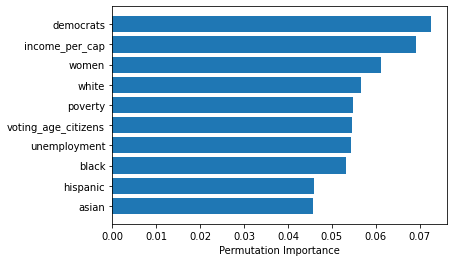

In [22]:
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(classifier, X_test, y_test)

feature_names = ['women','hispanic','white','black','asian','income_per_cap',
                 'poverty', 'unemployment', 'democrats', 'voting_age_citizens',
                 'believer_denier']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")